In [7]:
from sklearn import svm
import random
import numpy as np
import matplotlib.pyplot as plt

In [9]:
num_points = 40
x_range = (0, 1)  # Range of x-coordinates
y_range = (0, 1)  # Range of y-coordinates

points = []
random.seed(314)
for _ in range(num_points):
    x = random.uniform(*x_range)
    y = random.uniform(*y_range)
    points.append((x, y))

In [10]:
# separate points of 2 different classes A1 and A2
# class_array = []
A1 = []
A2 = []
for i in range(num_points):
  if 2*points[i][0] < points[i][1] + 0.5:
    # class_array.append(2)
    A2.append(points[i])
  else:
    # class_array.append(1)
    A1.append(points[i])

print(A1)
print(A2)

[(0.546775772335222, 0.44980420215853645), (0.6338449986872321, 0.17917116083839035), (0.6308587300754743, 0.14839689042323712), (0.6170090312678426, 0.5318076699401607), (0.9646295854322127, 0.5414206884964968), (0.482951354409035, 0.11183549954929195), (0.6250291056948265, 0.3994292797847029), (0.8319239259205234, 0.279292494681746), (0.43940442544236, 0.302123048902055), (0.3339135402909724, 0.006281103373812713), (0.6525928712860888, 0.265161665739331), (0.2970803240111345, 0.004305962848714873), (0.8483533742057102, 0.9631277876150312), (0.7165000155002392, 0.23834544040354533), (0.5905311935658255, 0.2508584298327128)]
[(0.19643127513153125, 0.11146576088475146), (0.002638761926157751, 0.628136078209587), (0.23423161656630698, 0.20769963716062256), (0.10781647126189531, 0.2437226243082945), (0.027989923549962437, 0.23797937909204758), (0.2549263540802743, 0.20914477218033212), (0.3490372398560899, 0.8171457224587763), (0.5168689704289824, 0.5666257869198055), (0.2155241713995979,

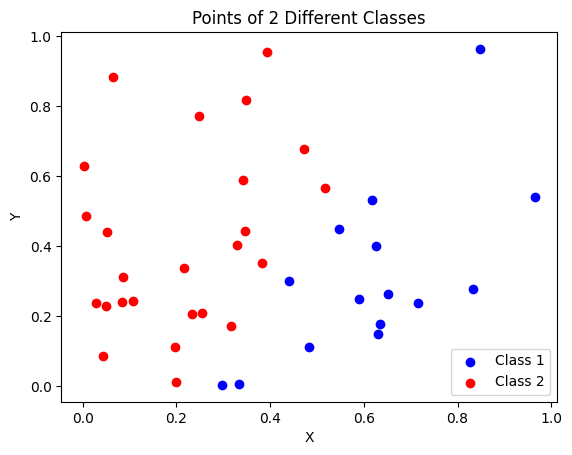

In [11]:
A1 = np.array(A1)
A2 = np.array(A2)

# Plot points for class 1 (A1)
plt.scatter(A1[:, 0], A1[:, 1], color='blue', label='Class 1')

# Plot points for class 2 (A2)
plt.scatter(A2[:, 0], A2[:, 1], color='red', label='Class 2')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points of 2 Different Classes')

# Add legend
plt.legend()

# Display the plot
plt.show()


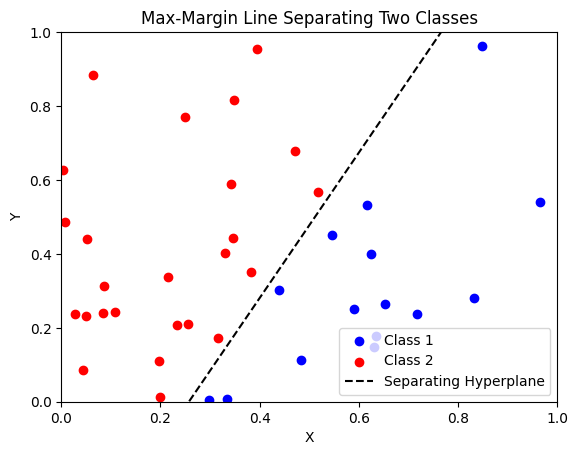

In [12]:
# Assuming Al and A2 are NumPy arrays containing the points for two different classes

# Combine the points from both classes
X = np.concatenate((A1, A2), axis=0)

# print(A2.shape[0])

# Create the target labels (class 0 for Al, class 1 for A2)
y = np.concatenate((np.zeros(A1.shape[0]), np.ones(A2.shape[0])))

# Fit the SVM model
model = svm.SVC(kernel='linear', C = 99999999)#, random_state = 42)
model.fit(X, y)

# Get the separating hyperplane parameters
w = model.coef_[0]
# print(w)
b = model.intercept_[0]
# print(b)

# Get the slope and intercept of the hyperplane
slope = -w[0] / w[1]
intercept = -b / w[1]

# Generate x values for plotting the line
# x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num=100)
x_vals = np.linspace(0, 1, num=100)
y_vals = slope * x_vals + intercept

# Plot the points and the separating hyperplane
plt.scatter(A1[:, 0], A1[:, 1], color='blue', label='Class 1')
plt.scatter(A2[:, 0], A2[:, 1], color='red', label='Class 2')
plt.plot(x_vals, y_vals, color='black', linestyle='--', label='Separating Hyperplane')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Max-Margin Line Separating Two Classes')

plt.xlim(0, 1)
plt.ylim(0, 1)

# Add legend
plt.legend()

# Display the plot
plt.show()
